<a href="https://colab.research.google.com/github/hany019/A1/blob/main/Copy_of_Task6_2_ELECTRE_III_jobs_ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 6.2: ELECTRE for ranking problems

This notebook is prepared to practise with the model of outranking in MCDA. The method used is ELECTRE for ranking. Prepare a report to submit in the virtual campus.

In order to draw some of the plots, the MCDA library needs [Graphviz](https://graphviz.org/) to be available in your system.

In Google Colab, Graphviz is already installed and there is no need to install it manually.

However, if you prefer to work with other environments:

In Linux systems, you can easily [install](https://graphviz.org/download/#linux) it using the APT or YUM package managers:
1. APT: `sudo apt install graphviz`
2. YUM: `sudo yum install graphviz`

In MAC, you can [install](https://graphviz.org/download/#mac) it through Homebrew or MacPorts:
1. Homebrew: `brew install graphviz`
2. MacPorts: `sudo port install graphviz`

On Windows, you can install the [provided EXE file](https://graphviz.org/download/#windows) or install it using the Windows Package Manager: `winget install graphviz`.
In either case, the system PATH must be modified to include the Graphviz directory (For instance `C:\Program Files\Graphviz\bin\`). Once it has been modified, the Anaconda environment must be restarted to properly load the PATH modification.



In [ ]:
!pip install mcda==0.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 771.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 26.1 MB/s eta 0:00:00


In [ ]:
from mcda.core.performance_table import *
from mcda.core.scales import *
from mcda.plot import *
from mcda.core.matrices import AdjacencyMatrix
from mcda.outranking.electre import *

The exercise is about a person that has studied computer science and is searching for a job. The goal is to make a ranking a set of jobs using 5 criteria: Salary, Company, Internationalization, Duration and Topic of the job.

The jobs offers are:


*   Id0: JAVA- Java programmer in AAA
*   Id1 : DATA - Data analyist in BBB
*   Id2 : SECUR - Computer security in CCC
*   Id3 : MANAG - Project manager in DDD
*   Id4 : ML - Machine learning in EEE
*   Id5 : USER - User assistance in FFF

Data is defined below. Weights indicate the relative voting power of each criterion in the concordance calculation.


In this implementation, it is required to define the scale of each criterion. There are quantitative (numerical) and qualitative (categorical) scales. This example uses only quantitative values. For each scale you must indicate the minimum possible value, the maximum one and the preference direction (MAX or MIN). A vector with the scales is needed as parameter in the ELECTRE functions.


In [ ]:
scales = {
    "Salary": QuantitativeScale(1000, 3000, PreferenceDirection.MAX),
    "Company": QuantitativeScale(1, 10, PreferenceDirection.MAX),
    "Internationalization": QuantitativeScale(1, 3, PreferenceDirection.MAX),
    "Duration": QuantitativeScale(3, 30, PreferenceDirection.MAX),
    "Topic": QuantitativeScale(1, 10, PreferenceDirection.MAX)
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
alternatives = ["0.JAVA", "1.DATA", "2.SECUR", "3.MANAG", "4.ML", "5.USER"]
criteria = {
    "Salary": 0.3,
    "Company": 0.2,
    "Internationalization": 0.1,
    "Duration": 0.2,
    "Topic": 0.2
    }

performance_table = PerformanceTable(
                    [[1600.0, 8, 2, 8.0, 3],
                     [2100.0, 3, 1, 12.0, 6],
                     [2400.0, 7, 3, 14.0, 7],
                     [2700.0, 6, 2, 24.0, 3],
                     [1700.0, 4, 2, 10.0, 9],
                     [1100.0, 7, 1, 22.0, 1]],
                     alternatives = alternatives,
                     criteria = criteria,
                     scales = scales)

performance_table.df

,Salary,Company,Internationalization,Duration,Topic
0.JAVA,1600.0,8,2,8.0,3
1.DATA,2100.0,3,1,12.0,6
2.SECUR,2400.0,7,3,14.0,7
3.MANAG,2700.0,6,2,24.0,3
4.ML,1700.0,4,2,10.0,9
5.USER,1100.0,7,1,22.0,1


Q1. The ELECTRE method needs some discrimination thresholds to calculate the concordance. Explain the meaning of the values of thresholds in this case study.

**(answer)(Q1) In ELECTRE III, discrimination thresholds help in differentiating between job offers based on certain criteria:**

Indifference threshold (q) indicates a range within which differences are too minor to affect the ranking (e.g., a 100€ difference in salary is considered negligible).

Preference threshold (p) marks the point where the difference between two alternatives is enough to influence a preference decision (e.g., a 300€ difference in salary is significant for preference).

Veto threshold (v) is used to completely reject an alternative if the difference exceeds a certain critical value, overriding the concordance (e.g., a 500€ difference in salary can lead to a veto).

In [ ]:
#Indifference thresholds
q = {
    "Salary": 100,
    "Company": 1,
    "Internationalization": 0,
    "Duration": 1.0,
    "Topic": 0
}

#Preference thresholds
p = {
    "Salary": 300,
    "Company": 2,
    "Internationalization": 0,
    "Duration": 3.0,
    "Topic": 2
}

#Veto thresholds
v = {
    "Salary": 500,
    "Company": None,
    "Internationalization": None,
    "Duration": 6.0,
    "Topic": 5
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Q2**. To calculate the concordance with pseudo-criteria, we must use the version III of ELECTRE. Look at the values in the matrix and the plot and explain them. You can increase the cut value in the plotting function, to just see a subset of the arcs.




 **(Answer)Q2)Q2: Explaining Concordance Calculation in ELECTRE III**


In assessing the concordance between jobs using ELECTRE III, the concordance matrix provides a quantified expression of preference relations. For job JAVA (0.JAVA) and job DATA (1.DATA), the concordance index is 0.3. This indicates a moderate level of concordance from JAVA to DATA when evaluated across all criteria. The score is derived from the weighted analysis of each criterion, applying indifference and preference thresholds to measure the extent of outranking.

The graph from the concordance matrix, filtered with a cut threshold of 0.5, effectively visualizes the strongest preferences, showing that while DATA does not strongly outrank JAVA, there is a noticeable level of preference. This selective visualization, omitting weaker connections, simplifies the interpretation and emphasizes the more decisive preference relations. The analysis suggests a nuanced decision landscape, where DATA is somewhat preferred to JAVA based on the collective assessment of the defined criteria within the model's thresholds.


-----------------------------------------------------------------------------



Q3. Reproduce manually the calculation of concordance between the job JAVA and job DATA.



**(Answer)Q3: Manual Concordance Calculation Between JAVA and DATA**



Let's take the provided criteria, weights, and performances for JAVA and DATA to calculate the concordance:

**Criteria and Weights:**
- Salary: Weight = 0.3
- Company: Weight = 0.2
- Internationalization: Weight = 0.1
- Duration: Weight = 0.2
- Topic: Weight = 0.2

**Performance Table:**
- JAVA: Salary = 1600, Company = 8, Internationalization = 2, Duration = 8, Topic = 3
- DATA: Salary = 2100, Company = 3, Internationalization = 1, Duration = 12, Topic = 6

**Thresholds:**
- Indifference (q): Salary = 100, Company = 1, Internationalization = 0, Duration = 1, Topic = 0
- Preference (p): Salary = 300, Company = 2, Internationalization = 0, Duration = 3, Topic = 2

Let's calculate concordance manually for each criterion, remembering that higher scores are better:

**1. Salary:**
- Difference = JAVA - DATA = 1600 - 2100 = -500 (negative, DATA is better)
- Concordance for Salary is 0.

**2. Company:**
- Difference = JAVA - DATA = 8 - 3 = 5 (positive, JAVA is better)
- Concordance for Company is 1.

**3. Internationalization:**
- Difference = JAVA - DATA = 2 - 1 = 1 (positive, JAVA is better)
- Concordance for Internationalization is 1.

**4. Duration:**
- Difference = JAVA - DATA = 8 - 12 = -4 (negative, DATA is better)
- Since it's within the preference threshold, we calculate the proportional concordance: (-4 + 3)/(3 - 1) = - 0.5, but since concordance cannot be negative, it remains 0.

**5. Topic:**
- Difference = JAVA - DATA = 3 - 6 = -3 (negative, DATA is better)
- Concordance for Topic is 0.

Now, we aggregate the concordance index by considering the weights:

**Aggregate Concordance:**
 C(a, b) = sum[C{ij}(a, b) * weight of i) ]

**Total Concordance for JAVA vs DATA:**

C{JAVA, DATA} = (0 * 0.3) + (1 * 0.2) + (1 *0.1) + (0 *  0.2) + (0 * 0.2)

C{JAVA, DATA} = 0 + 0.2 + 0.1 + 0 + 0

C{JAVA, DATA} = 0.3

Therefore, the concordance index of JAVA to DATA considering all criteria and their weights is 0.3. This is a simplified illustration, and in practice, ELECTRE III calculations can be much more complex, especially when considering veto thresholds and discordance.


,0.JAVA,1.DATA,2.SECUR,3.MANAG,4.ML,5.USER
0.JAVA,1.0,0.3,0.2,0.5,0.7,0.8
1.DATA,0.7,1.0,0.2,0.2,0.7,0.6
2.SECUR,1.0,1.0,1.0,0.5,0.8,0.8
3.MANAG,0.8,0.8,0.7,1.0,0.8,1.0
4.ML,0.8,0.6,0.2,0.3,1.0,0.6
5.USER,0.4,0.5,0.4,0.3,0.4,1.0


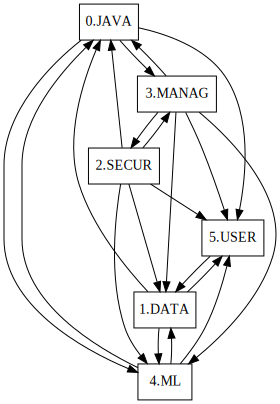

In [ ]:
electre3 = Electre3(criteria_weights=criteria, preference_thresholds=p, indifference_thresholds=q, veto_thresholds=v, alpha=0.3, beta=-0.15)
concordance_matrix = electre3.concordance(performance_table)

display(concordance_matrix)

#Now we plot the graph of concordance with relations above the cut threshold
cut_threshold = 0.5
conc_mat_cut = concordance_matrix.where(concordance_matrix >= cut_threshold, other=0)
AdjacencyMatrix(conc_mat_cut).plot()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q4. After the concordance, the method calculates the discordance (using the veto thresholds). Explain the result obtained.


In the ELECTRE III methodology, following the concordance assessment, discordance is evaluated using veto thresholds to identify any significantly unfavorable criteria that could potentially override the favorable concordance indices. Discordance is crucial as it ensures that severe shortcomings in any critical criterion are not overshadowed by moderate strengths in others.

**Discordance Calculation Method:**
Discordance for each criterion is determined if the performance discrepancy between two alternatives exceeds the set veto threshold for that criterion. This measurement helps in deciding if the poor performance on a particular criterion is substantial enough to reject an alternative despite its advantages on other criteria.

**Example Analysis with Provided Data:**
For the job positions JAVA and DATA, considering the veto thresholds:

Salary Veto Threshold: 500
Duration Veto Threshold: 6.0
Topic Veto Threshold: 5
Given performances for JAVA and DATA are:

JAVA: Salary = 1600, Duration = 8, Topic = 3
DATA: Salary = 2100, Duration = 12, Topic = 6
The discordance calculations are:

**Salary:**
Difference = 2100 (DATA) - 1600 (JAVA) = 500
Since the difference meets the veto threshold (500), the discordance for Salary is 1, indicating a strong reason to prefer DATA over JAVA based purely on salary.

**Duration and Topic:**
Duration difference = 12 - 8 = 4 and Topic difference = 6 - 3 = 3
Both differences are below their respective veto thresholds (6 for Duration and 5 for Topic), resulting in no discordance (0) for these criteria.

**Result Explanation:**
The discordance result demonstrates that while JAVA may have favorable aspects in some criteria, the significant disparity in salary, which meets the veto criteria, serves as a decisive factor against choosing JAVA over DATA. This outcome emphasizes the role of discordance in ensuring that decisions are not just based on the presence of strengths but also the absence of critical weaknesses.

**Conclusion:**
This methodology ensures robust decision-making by preventing choices that, while generally favorable, fail dramatically in key areas. The discordance analysis thus complements the concordance by providing a safeguard against potentially misleading aggregated favorable scores.


Q5. Reproduce manually the discordance between job JAVA and job DATA.



In [ ]:
discordance_matrix = electre3.discordance(performance_table)
discordance_matrix

,0.JAVA,1.DATA,2.SECUR,3.MANAG,4.ML,5.USER
0.JAVA,Salary 0 Company ...,Salary 1.000000 Company ...,Salary 1.000000 Company ...,Salary 1 Company ...,Salary 0 Company ...,Salary 0 Company ...
1.DATA,Salary 0 Company ...,Salary 0 Company ...,Salary 0 Company ...,Salary 1 Company ...,Salary 0.000000 Company ...,Salary 0 Company ...
2.SECUR,Salary 0 Company ...,Salary 0 Company ...,Salary 0 Company ...,Salary 0 Company ...,Salary 0 Company ...,Salary 0 Company ...
3.MANAG,Salary 0 Company ...,Salary 0.000000 Company ...,Salary 0.000000 Company ...,Salary 0 Company ...,Salary 0 Company ...,Salary 0 Company ...
4.ML,Salary 0 Company ...,Salary 0.5 Company ...,Salary 1.000000 Company ...,Salary 1 Company ...,Salary 0 Company ...,Salary 0 Company ...
5.USER,Salary 1.0 Company ...,Salary 1.0 Company ...,Salary 1 Company ...,Salary 1 Company ...,Salary 1 Company ...,Salary 0 Company ...


The credibility step merges concordance with discordance. The following method makes the calculations internally, so the 3 thresholds are needed, together with weigths and scales.

Q6. What changes can you detect between the matrix of concordance and the matrix of credibility? Why do we have those changes? How many alternatives increase their concordance level? Why?



In [ ]:
credibility_matrix = electre3.construct(performance_table)
credibility_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0.JAVA,1.DATA,2.SECUR,3.MANAG,4.ML,5.USER
0.JAVA,1.0,0.0,0.0,0.0,0.0,0.0
1.DATA,0.7,1.0,0.2,0.0,0.7,0.0
2.SECUR,1.0,1.0,1.0,0.0,0.8,0.0
3.MANAG,0.8,0.8,0.7,1.0,0.0,1.0
4.ML,0.8,0.6,0.0,0.0,1.0,0.0
5.USER,0.0,0.0,0.0,0.0,0.0,1.0


Introduce a plot to see the graph of Credibility of scores greater than 0.5. Observe the differences with respect to the graph of Concordance. Do they validate your previous answer?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



The following code executes the ascending and descending distillation steps. With the two rankings obtained, it is then calculated the final ranking, which is a partial pre-order. It is called step by step, but you can also call directly to make the exploitation and see the ranking.

Plot shows you the preference ranking found at each distillation and then the partial pre-order graph.

Q7. Execute the code and explain the graphics.


[['2.SECUR', '3.MANAG', '4.ML'], ['0.JAVA', '1.DATA', '5.USER']]


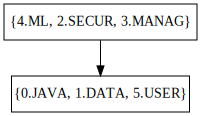

In [ ]:
ascending = electre3.distillation(credibility_matrix, ascending=True)
print(ascending)
ascending_dist_matrix = OutrankingMatrix.from_ranked_categories(ascending)
ascending_dist_matrix.graph_condensation.plot()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['2.SECUR'], ['3.MANAG'], ['0.JAVA', '1.DATA', '4.ML', '5.USER']]


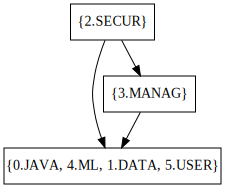

In [ ]:
descending = electre3.distillation(credibility_matrix, ascending=False)
print(descending)
descending_dist_matrix = OutrankingMatrix.from_ranked_categories(descending)
descending_dist_matrix.graph_condensation.plot()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


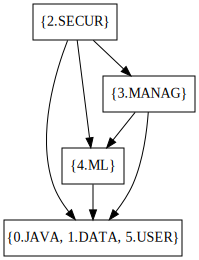

In [ ]:
ranking = electre3.exploit(credibility_matrix)
ranking.graph_condensation.plot()

Q8. Introduce a new job in the dataset above (the one defined in question 1). It must be very good in the 4 first criteria and very bad in the last criterion. Repeat the exercise and compare the results. Explain its relations in the credibility matrix and its position in the final ranking.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Q9. What happens if we change the thresholds as indicated below?
Run again and compare the credibility matrix and the ranking obtained with the ones of question 10.
Explain the results and the motivation of the changes.

In [ ]:
#Indifference thresholds
q = {
    "Salary": 0,
    "Company": 0,
    "Internationalization": 0,
    "Duration": 0,
    "Topic": 0
}

#Preference thresholds
p = {
    "Salary": 300,
    "Company": 1,
    "Internationalization": 0,
    "Duration": 3,
    "Topic": 2
}

#Veto thresholds
v = {
    "Salary": 500,
    "Company": 3,
    "Internationalization": 2,
    "Duration": 5,
    "Topic": 3
}